### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") #Never display warnings which match

In [2]:
#Setting random seed & creating Faker Instance
np.random.seed(42)

### Creating The Dataset Of Student Academic Performance

In [3]:
num_students = 75
students_data = {'Student_ID': np.arange(1,num_students+1),
                 'Name': ['Student_' + str(i) for i in range(1, num_students+1)]
                }

Scores_data = {'Student_ID': np.arange(1, num_students + 1),
               'DS_Score': np.random.randint(0, 100, size=num_students),
               'AI_Score': np.random.randint(0, 100, size=num_students),
               'CC_Score': np.random.randint(0, 100, size=num_students),
               'CS_Score': np.random.randint(0, 100, size=num_students),
                }

df = pd.DataFrame(students_data).merge(pd.DataFrame(Scores_data), on='Student_ID')

In [4]:
#Adding Null Values
subjects = ['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']
for subject in subjects:
    df.loc[df.sample(frac=0.1).index, subject] = np.nan  

In [5]:
#Adding Outliers
outlier_fraction = 0.1  
outliers_indices = df.sample(frac=outlier_fraction).index
for subject in ['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']:
    df.loc[outliers_indices, subject] = np.random.randint(150, 200, size=len(outliers_indices))

In [6]:
#Final Dataset is ready...........!!!!
df

,Student_ID,Name,DS_Score,AI_Score,CC_Score,CS_Score
0,1,Student_1,51.0,3.0,26.0,91.0
1,2,Student_2,NaN,53.0,8.0,53.0
2,3,Student_3,14.0,NaN,78.0,86.0
3,4,Student_4,71.0,62.0,14.0,95.0
4,5,Student_5,60.0,17.0,89.0,96.0
...,...,...,...,...,...,...
70,71,Student_71,181.0,185.0,163.0,161.0
71,72,Student_72,3.0,NaN,80.0,8.0
72,73,Student_73,1.0,4.0,58.0,98.0
73,74,Student_74,5.0,89.0,1.0,18.0


### Understanding The Dataset

In [7]:
df.shape

(75, 6)

In [8]:
df.columns

Index(['Student_ID', 'Name', 'DS_Score', 'AI_Score', 'CC_Score', 'CS_Score'], dtype='object')

In [9]:
df.describe()

,Student_ID,DS_Score,AI_Score,CC_Score,CS_Score
count,75.000000,68.000000,68.000000,68.000000,69.000000
mean,38.000000,62.514706,63.397059,63.205882,64.927536
std,21.794495,51.793359,51.041435,51.924905,45.804353
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,19.500000,27.500000,26.500000,26.000000,31.000000
50%,38.000000,55.500000,56.000000,58.000000,58.000000
75%,56.500000,77.500000,85.250000,85.500000,89.000000
max,75.000000,198.000000,196.000000,198.000000,180.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  75 non-null     int32  
 1   Name        75 non-null     object 
 2   DS_Score    68 non-null     float64
 3   AI_Score    68 non-null     float64
 4   CC_Score    68 non-null     float64
 5   CS_Score    69 non-null     float64
dtypes: float64(4), int32(1), object(1)
memory usage: 3.4+ KB


### Checking for Null / Missing Values

In [11]:
df.isnull().sum()

Student_ID    0
Name          0
DS_Score      7
AI_Score      7
CC_Score      7
CS_Score      6
dtype: int64

In [13]:
#Handling Missing Values
df['DS_Score'].fillna(df['DS_Score'].mean(), inplace=True)
df['AI_Score'].fillna(df['AI_Score'].mean(), inplace=True)
df['CC_Score'].fillna(df['CC_Score'].mean(), inplace=True)
df['CS_Score'].fillna(df['CS_Score'].mean(), inplace=True)

In [14]:
df.isnull().sum()

Student_ID    0
Name          0
DS_Score      0
AI_Score      0
CC_Score      0
CS_Score      0
dtype: int64

### Checking For Outliers

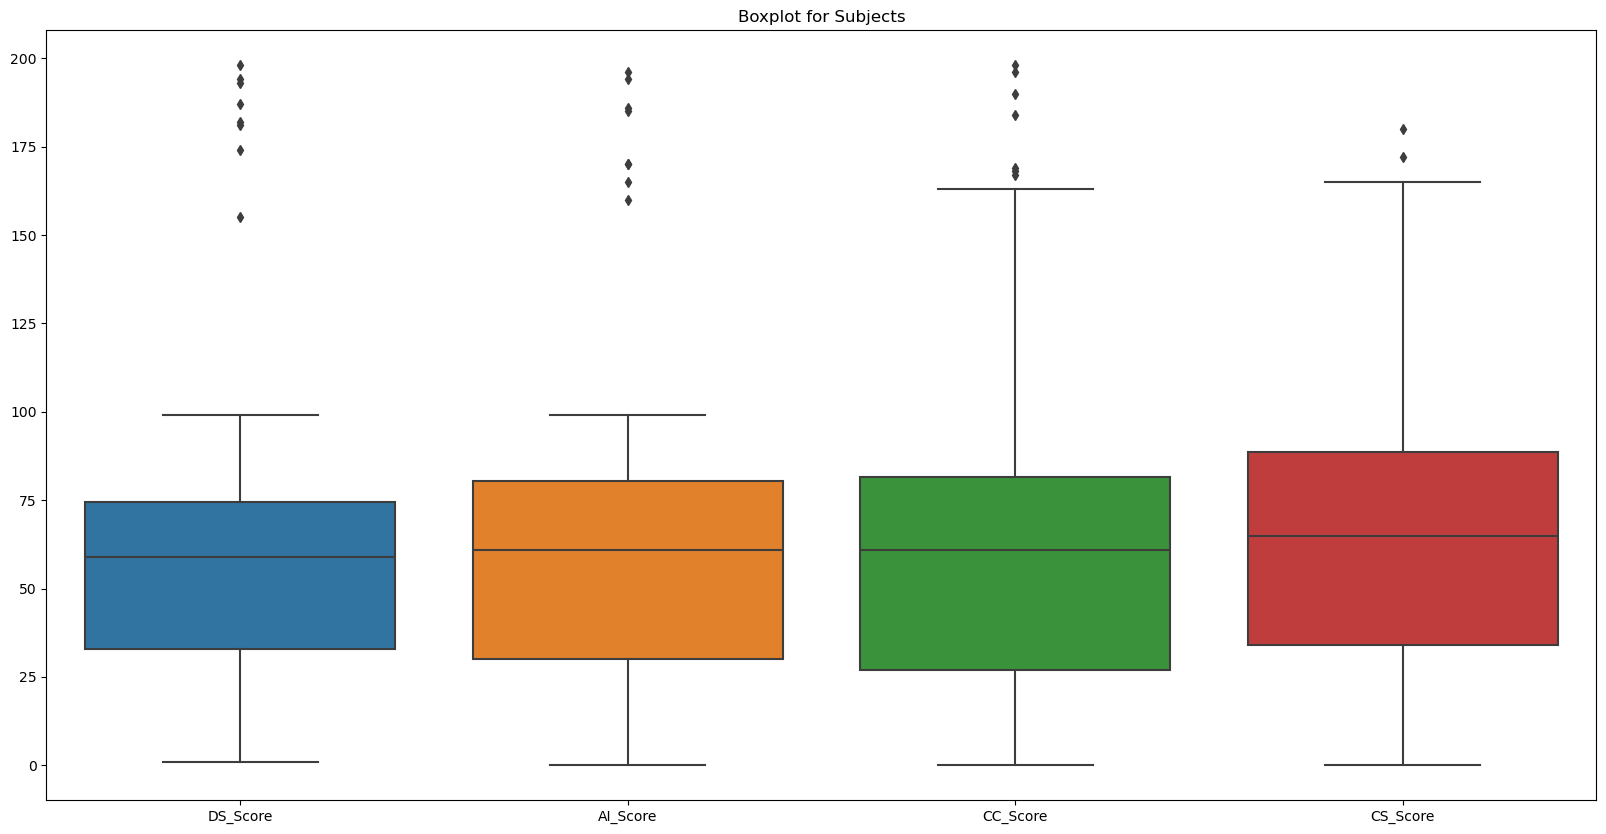

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']])
plt.title('Boxplot for Subjects')
plt.show()

In [16]:
#Finding total outliers in all columns

def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

outliers_df = df.select_dtypes(include=np.number).apply(find_outliers)
sum_of_outliers = outliers_df.sum()
print("Sum of outliers in each column:")
print(sum_of_outliers)

Sum of outliers in each column:
Student_ID    0
DS_Score      8
AI_Score      8
CC_Score      7
CS_Score      2
dtype: int64


In [17]:
#Old Shape of Dataset
df.shape

(75, 6)

In [18]:
#Removing Outliers
df = df.loc[~outliers_df.any(axis=1)]

In [19]:
#New Shape of Dataset
df.shape

(67, 6)

In [20]:
df

,Student_ID,Name,DS_Score,AI_Score,CC_Score,CS_Score
0,1,Student_1,51.000000,3.000000,26.0,91.0
1,2,Student_2,62.514706,53.000000,8.0,53.0
2,3,Student_3,14.000000,63.397059,78.0,86.0
3,4,Student_4,71.000000,62.000000,14.0,95.0
4,5,Student_5,60.000000,17.000000,89.0,96.0
...,...,...,...,...,...,...
69,70,Student_70,35.000000,77.000000,2.0,36.0
71,72,Student_72,3.000000,63.397059,80.0,8.0
72,73,Student_73,1.000000,4.000000,58.0,98.0
73,74,Student_74,5.000000,89.000000,1.0,18.0


### Data Transformation

In [21]:
#Changing datatype of float columns to round off integer type
float_columns = ['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']
df[float_columns] = df[float_columns].round().astype(int)

In [22]:
#Adding extra Column
total_marks = 400  # Setting the total marks for 4 subjects
df['Total'] = df[['DS_Score', 'AI_Score', 'CC_Score', 'CS_Score']].sum(axis=1)

In [23]:
df

,Student_ID,Name,DS_Score,AI_Score,CC_Score,CS_Score,Total
0,1,Student_1,51,3,26,91,171
1,2,Student_2,63,53,8,53,177
2,3,Student_3,14,63,78,86,241
3,4,Student_4,71,62,14,95,242
4,5,Student_5,60,17,89,96,262
...,...,...,...,...,...,...,...
69,70,Student_70,35,77,2,36,150
71,72,Student_72,3,63,80,8,154
72,73,Student_73,1,4,58,98,161
73,74,Student_74,5,89,1,18,113


In [24]:
#Converting the 'Total' column to a SGPA column to change the scale
df['SGPA'] = (df['Total'] / total_marks) * 10
df['SGPA'] = df['SGPA'].round(1)

In [25]:
df

,Student_ID,Name,DS_Score,AI_Score,CC_Score,CS_Score,Total,SGPA
0,1,Student_1,51,3,26,91,171,4.3
1,2,Student_2,63,53,8,53,177,4.4
2,3,Student_3,14,63,78,86,241,6.0
3,4,Student_4,71,62,14,95,242,6.0
4,5,Student_5,60,17,89,96,262,6.6
...,...,...,...,...,...,...,...,...
69,70,Student_70,35,77,2,36,150,3.8
71,72,Student_72,3,63,80,8,154,3.8
72,73,Student_73,1,4,58,98,161,4.0
73,74,Student_74,5,89,1,18,113,2.8


### Data Normalization and Skewness

In [26]:
#Checking skewness of Original variable and Transformed variable
from scipy import stats

total_data = df['Total']

skewness_before = stats.skew(total_data)
print("Skewness Before Transformation = ",skewness_before)

transformed_data,lamda_value = stats.boxcox(total_data)
skewness_after = stats.skew(transformed_data)
print("Skewness After Transformation = ",skewness_after)

Skewness Before Transformation =  -0.16316809394169834
Skewness After Transformation =  -0.07582507406787861


Text(0.5, 1.0, 'Transformed Distribution (Skewness: -0.08)')

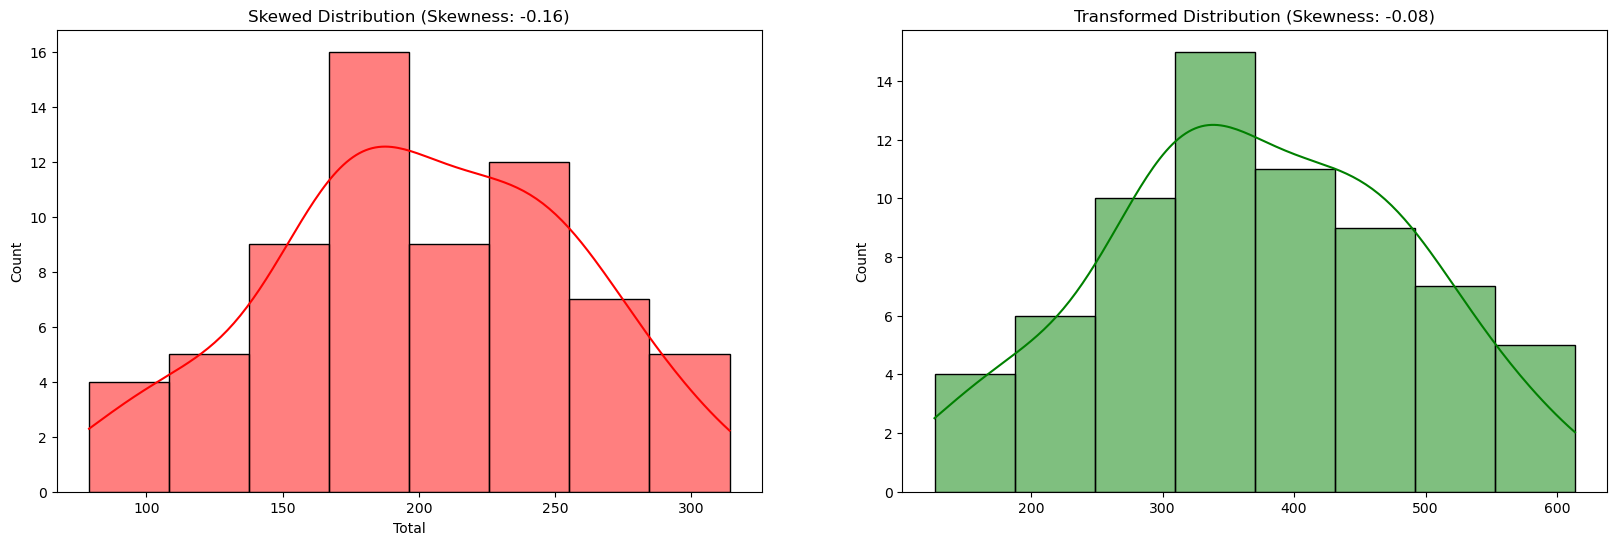

In [27]:
#Plotting the Skewness
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(total_data, kde=True , color= 'red')
plt.title(f'Skewed Distribution (Skewness: {skewness_before:.2f})')


plt.subplot(1, 2, 2)
sns.histplot(transformed_data, kde=True, color= 'green')
plt.title(f'Transformed Distribution (Skewness: {skewness_after:.2f})')